In [101]:
from statistics import mean, median, mode, pvariance
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import root
from scipy.stats import norm

Mean X = 71.45
Median X = 71.5
Mode X = 74


In [ ]:
# A. Найти среднее, медиану и моду величины X

In [ ]:
X = [69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76]
Y = [153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140,  150, 165, 185, 210, 220]

print('Mean X =', mean(X))
print('Median X =', median(X))
print('Mode X =', mode(X))

In [102]:
# var = E([X - E(X)] ^ 2) 
print('Variance Y =', mean([(y - mean(Y)) ** 2 for y in Y]))

Variance Y = 1369.21


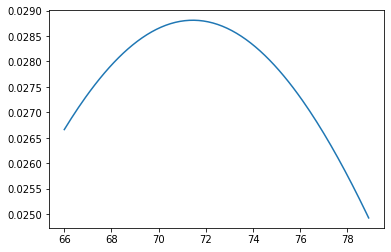

In [103]:
var = pvariance(X)
x_ax = np.arange(min(X), max(X), 0.1)
y_ax = [1 / (var * np.sqrt(2 * np.pi )) * np.exp(- (x - mean(X)) ** 2/ (2 * var ** 2)) for x in x_ax]
plt.plot(x_ax, y_ax)
plt.show()

In [104]:
print('p(x>80) =', sum(list(map(lambda x: x > 80, X))) / len(X))

p(x>80) = 0.0


In [105]:
print('mean(X, Y) =', np.mean([X, Y], axis=1))
print('cov(X,Y) =\n', np.cov([X, Y]))

mean(X, Y) = [ 71.45 164.7 ]
cov(X,Y) =
 [[  14.57631579  128.87894737]
 [ 128.87894737 1441.27368421]]


In [106]:
XY = [e[0] * e[1] for e in zip(X, Y)]
print('cor(X, Y) =', (mean(XY) - mean(X) * mean(Y)) / (np.sqrt(pvariance(X) * pvariance(Y))) )

cor(X, Y) = 0.8891701351748014


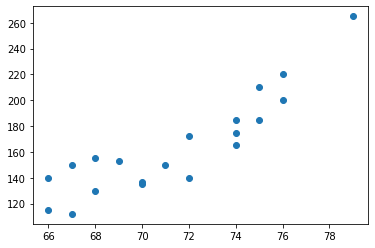

In [107]:
plt.scatter(X, Y)
plt.show()

In [108]:
X1 = [17, 11, 11]
X2 = [17, 9, 8]
X3 = [12, 13, 19]

cov = np.cov([X1, X2, X3])
print('cov(X1, X2, X3) =\n', cov)
print('variance =', np.linalg.det(cov))

cov(X1, X2, X3) =
 [[ 12.          17.          -8.        ]
 [ 17.          24.33333333 -12.83333333]
 [ -8.         -12.83333333  14.33333333]]
variance = 0.0


Value of 5 is more likely to be generated by the A distribution
Value of 6 is more likely to be generated by the B distribution
Value of 6 is more likely to be generated by the B distribution
Value that will be equally likely generated by the two distributions is [5.65990966]


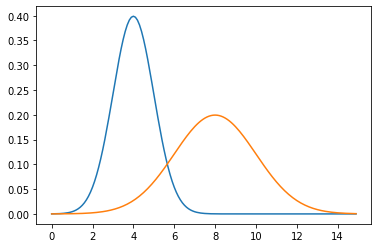

In [109]:
N_a_mean, N_b_mean = 4, 8
N_a_stdev, N_b_stdev = 1, 2
x_ax = np.arange(0, 15, 0.1)

A = stats.norm.pdf(x_ax, N_a_mean, N_a_stdev)
B = stats.norm.pdf(x_ax, N_b_mean, N_b_stdev)

plt.plot(x_ax, A)
plt.plot(x_ax, B)

def get_p_by_value(v):
    i = np.where(x_ax == v)[0][0]
    return 'A' if A[i] >= B[i] else 'B'

def get_eq():
    return root(lambda x: norm.pdf(x, N_a_mean, N_a_stdev) - norm.pdf(x, N_b_mean, N_b_stdev), 5).x[0]

print(f'Value of 5 is more likely to be generated by the {get_p_by_value(5)} distribution')
print(f'Value of 6 is more likely to be generated by the {get_p_by_value(6)} distribution')
print(f'Value of 6 is more likely to be generated by the {get_p_by_value(7)} distribution')

print(f'Value that will be equally likely generated by the two distributions is {get_eq()}')


